In [37]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
import wordcloud  
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import emoji
import seaborn as sns
sns.set()

In [2]:
stop_words=stopwords.words('english')

In [3]:
df=pd.read_csv("C:\\Users\\Arjit's Hardwork\\Downloads\\WhatsApp Chat with IPBA Question & Answer Gp.txt",sep='\t',skiprows=1,names=["TEXT"])

In [4]:
df.head()

,TEXT
0,"03/01/20, 9:04 pm - +91 77950 01945 created gr..."
1,"09/01/20, 12:05 pm - You joined using this gro..."
2,"09/01/20, 1:06 pm - +91 77220 35116: I also go..."
3,"09/01/20, 1:06 pm - +91 77220 35116: But on su..."
4,"09/01/20, 1:06 pm - +91 77220 35116: Anyone el..."


In [5]:
df.shape

(1528, 1)

In [6]:
df["TEXT"]=df["TEXT"].str.lower()

In [7]:
df["DATE"]=df["TEXT"].str.split(n=1).str.get(0)

In [8]:
df["TIME"]=df["TEXT"].str.split(n=2).str.get(1)

In [9]:
df["PHONE NUMBERS"]=df["TEXT"].str.split(n=3,expand=True).get(3).str.split(":").str.get(0)

In [10]:
df.head()

,TEXT,DATE,TIME,PHONE NUMBERS
0,"03/01/20, 9:04 pm - +91 77950 01945 created gr...","03/01/20,",9:04,"- +91 77950 01945 created group ""ipba question..."
1,"09/01/20, 12:05 pm - you joined using this gro...","09/01/20,",12:05,- you joined using this group's invite link
2,"09/01/20, 1:06 pm - +91 77220 35116: i also go...","09/01/20,",1:06,- +91 77220 35116
3,"09/01/20, 1:06 pm - +91 77220 35116: but on su...","09/01/20,",1:06,- +91 77220 35116
4,"09/01/20, 1:06 pm - +91 77220 35116: anyone el...","09/01/20,",1:06,- +91 77220 35116


In [11]:
df["FULL_TEXT"]=df["TEXT"].str.split(n=3,expand=True).get(3).str.split(":").str.get(1)

In [12]:
df.head()

,TEXT,DATE,TIME,PHONE NUMBERS,FULL_TEXT
0,"03/01/20, 9:04 pm - +91 77950 01945 created gr...","03/01/20,",9:04,"- +91 77950 01945 created group ""ipba question...",NaN
1,"09/01/20, 12:05 pm - you joined using this gro...","09/01/20,",12:05,- you joined using this group's invite link,NaN
2,"09/01/20, 1:06 pm - +91 77220 35116: i also go...","09/01/20,",1:06,- +91 77220 35116,i also got 0.83
3,"09/01/20, 1:06 pm - +91 77220 35116: but on su...","09/01/20,",1:06,- +91 77220 35116,but on submitting it shows incorrect
4,"09/01/20, 1:06 pm - +91 77220 35116: anyone el...","09/01/20,",1:06,- +91 77220 35116,anyone else getting any other value?


In [13]:
df.drop("TEXT",axis=1,inplace=True)

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(1376, 4)

In [16]:
df.head()

,DATE,TIME,PHONE NUMBERS,FULL_TEXT
2,"09/01/20,",1:06,- +91 77220 35116,i also got 0.83
3,"09/01/20,",1:06,- +91 77220 35116,but on submitting it shows incorrect
4,"09/01/20,",1:06,- +91 77220 35116,anyone else getting any other value?
5,"09/01/20,",1:07,- +91 77220 35116,0.8296 is what i m getting so rounded to 0.83
6,"09/01/20,",1:07,- +91 98301 39007,what package u using?


In [17]:
df.reset_index(drop=True,inplace=True)

In [18]:
df["DATE"]=df["DATE"].str.strip().str.replace(","," ")

In [19]:
df["DATE"]=pd.to_datetime(df["DATE"],dayfirst=True,errors='coerce')

In [20]:
df["PHONE NUMBERS"]=df["PHONE NUMBERS"].str.strip().str.replace("-",'')

In [21]:
df.head()

,DATE,TIME,PHONE NUMBERS,FULL_TEXT
0,2020-01-09,1:06,+91 77220 35116,i also got 0.83
1,2020-01-09,1:06,+91 77220 35116,but on submitting it shows incorrect
2,2020-01-09,1:06,+91 77220 35116,anyone else getting any other value?
3,2020-01-09,1:07,+91 77220 35116,0.8296 is what i m getting so rounded to 0.83
4,2020-01-09,1:07,+91 98301 39007,what package u using?


In [22]:
df["FULL_TEXT"]=df["FULL_TEXT"].str.strip()

In [23]:
type(df["FULL_TEXT"])

pandas.core.series.Series

In [24]:
import re

In [25]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

def clean_messages(lst):
    lst = np.vectorize(remove_pattern)(lst,"[\d]" )
    return lst
    lst = np.vectorize(remove_pattern)(lst,"[\W]")
    return lst
    lst = np.vectorize(remove_pattern)(lst,'\b[a-zA-Z]\b') 
    return lst
    lst = np.vectorize(remove_pattern)(lst,"\s+") 
    return lst
    lst = np.vectorize(remove_pattern)(lst, string.punctuations) 
    return lst
    lst = np.vectorize(remove_pattern)(lst, stop_words) 
    return lst


In [26]:
clean_messages=clean_messages(df["FULL_TEXT"])

In [27]:
dt=pd.DataFrame(clean_messages)

In [28]:
dt.rename(columns={0:"TEXT"},inplace=True)

In [29]:
new_df=pd.merge(df,dt,how='outer',right_index=True,left_index=True)

In [30]:
new_df.drop("FULL_TEXT",axis=1,inplace=True)

In [31]:
new_df.head()

,DATE,TIME,PHONE NUMBERS,TEXT
0,2020-01-09,1:06,+91 77220 35116,i also got .
1,2020-01-09,1:06,+91 77220 35116,but on submitting it shows incorrect
2,2020-01-09,1:06,+91 77220 35116,anyone else getting any other value?
3,2020-01-09,1:07,+91 77220 35116,. is what i m getting so rounded to .
4,2020-01-09,1:07,+91 98301 39007,what package u using?


In [32]:
new_df['scores'] = new_df['TEXT'].apply(lambda TEXT: sid.polarity_scores(TEXT))

In [33]:
new_df.head()

,DATE,TIME,PHONE NUMBERS,TEXT,scores
0,2020-01-09,1:06,+91 77220 35116,i also got .,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2020-01-09,1:06,+91 77220 35116,but on submitting it shows incorrect,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2020-01-09,1:06,+91 77220 35116,anyone else getting any other value?,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'comp..."
3,2020-01-09,1:07,+91 77220 35116,. is what i m getting so rounded to .,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2020-01-09,1:07,+91 98301 39007,what package u using?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [34]:
new_df['compound']  = new_df['scores'].apply(lambda score_dict: score_dict['compound'])
new_df.head()

,DATE,TIME,PHONE NUMBERS,TEXT,scores,compound
0,2020-01-09,1:06,+91 77220 35116,i also got .,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00
1,2020-01-09,1:06,+91 77220 35116,but on submitting it shows incorrect,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00
2,2020-01-09,1:06,+91 77220 35116,anyone else getting any other value?,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'comp...",0.34
3,2020-01-09,1:07,+91 77220 35116,. is what i m getting so rounded to .,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00
4,2020-01-09,1:07,+91 98301 39007,what package u using?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00


In [71]:
new_df['comp_score'] =new_df['compound'].apply(lambda x: 'pos' if x >0 else('neu' if x==0 else 'neg'))
new_df.head()

,DATE,TIME,PHONE NUMBERS,TEXT,scores,compound,comp_score
0,2020-01-09,1:06,+91 77220 35116,i also got .,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,neu
1,2020-01-09,1:06,+91 77220 35116,but on submitting it shows incorrect,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,neu
2,2020-01-09,1:06,+91 77220 35116,anyone else getting any other value?,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'comp...",0.34,pos
3,2020-01-09,1:07,+91 77220 35116,. is what i m getting so rounded to .,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,neu
4,2020-01-09,1:07,+91 98301 39007,what package u using?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.00,neu


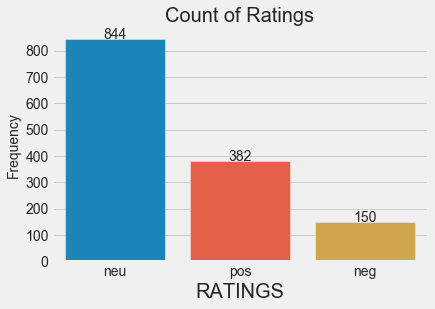

In [47]:
plt.style.use("fivethirtyeight")
g = sns.countplot( x='comp_score', data=new_df)
g.set_xticklabels(g.get_xticklabels(),rotation=0)
plt.xlabel('RATINGS',fontsize = 20);
plt.ylabel('Frequency',fontsize = 14);
plt.title("Count of Ratings",fontsize=20)
for tick in g.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in g.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [48]:
a=new_df["TEXT"].tolist()

In [ ]:
#converting list to string function

In [49]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1  

In [50]:
text=listToString(a)

In [55]:
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3','👍🏻','😊',"🤦🏻","'😅"
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

In [56]:
wordtokens=word_tokenize(text)
filtered_tokens = [w for w in wordtokens if not w in (stop_words and emoticons and string.punctuation)]

In [57]:
filtered_tokens

['i',
 'also',
 'got',
 '.but',
 'on',
 'submitting',
 'it',
 'shows',
 'incorrectanyone',
 'else',
 'getting',
 'any',
 'other',
 'value',
 'is',
 'what',
 'i',
 'm',
 'getting',
 'so',
 'rounded',
 'to',
 '.what',
 'package',
 'u',
 'using',
 'i',
 'used',
 'er',
 'package',
 'n',
 'caretyesvif',
 'rightlibrary',
 'caret',
 'no',
 'not',
 'vif',
 '...',
 'accuracywhich',
 'question',
 'please',
 'is',
 'it',
 'confusion',
 'matrixcorrect',
 'answer',
 'for',
 'question',
 'i',
 'm',
 'getting',
 'same',
 'i',
 'used',
 'direct',
 'function',
 'for',
 'confusion',
 'matrixbut',
 'on',
 'submitting',
 'it',
 'shows',
 'incorrect',
 'answerme',
 'too',
 'getting',
 'this',
 'resultquestion',
 'if',
 'anyone',
 'has',
 'something',
 'else',
 'let',
 'me',
 'knowits',
 'correctdid',
 'anyone',
 'try',
 '.this',
 'is',
 'wrong',
 'i',
 'lost',
 'marks',
 'for',
 'q.',
 'is',
 'correcttry',
 'as',
 'moses',
 'saidwhich',
 'one',
 'none',
 'of',
 'the',
 'above',
 'is',
 'not',
 'right',
 'a

In [58]:
lemma_words=[]
for w in filtered_tokens:
    rootWord = WordNetLemmatizer().lemmatize(w)
    print(rootWord)
    lemma_words.append(rootWord)

i
also
got
.but
on
submitting
it
show
incorrectanyone
else
getting
any
other
value
is
what
i
m
getting
so
rounded
to
.what
package
u
using
i
used
er
package
n
caretyesvif
rightlibrary
caret
no
not
vif
...
accuracywhich
question
please
is
it
confusion
matrixcorrect
answer
for
question
i
m
getting
same
i
used
direct
function
for
confusion
matrixbut
on
submitting
it
show
incorrect
answerme
too
getting
this
resultquestion
if
anyone
ha
something
else
let
me
knowits
correctdid
anyone
try
.this
is
wrong
i
lost
mark
for
q.
is
correcttry
a
moses
saidwhich
one
none
of
the
above
is
not
right
answerthis
is
correct🤦🏻‍♂option
is
correct..
but
you
need
to
prove
itwhat
wa
ques
😅did
everyone
get
it
wrong
question
is
correct
like
mayuri
saidbut
everyone
saying
it
's
wrongok
i
got
/you
can
take
my
word😉pls
explain
how.😅awsome
...
.same
here
😄expected
😛good
going
guys👏🏻👏🏻i
got
a
i
lost
in
q
and
also
qi
submitted
sunday
itselfi
didn
’
t
tell
any
answer
directly
a
you
will
miss
the
fun
of
solving👍🏻there
are

a
doubt
a
when
i
fitted
the
model
in
excel
using
additive
series
my
seasonality
index
were
different
and
when
i
fixed
it
while
doing
multipicative
series
i
wa
getting
the
same
result
a
we
were
getting
in
our
assignmentmore
over
i
read
that
when
u
have
seasonality
index
for
each
quarter
they
shud
add
up
to
a
we
had
quarterly
datahell
lot
of
confusion
have
gone
through
this
timensdiffs
i
used
in
gap
seriesadditive
model
will
give
zero
multiplicative
add
a
ratio
is
taken
to
mean
to
get
index
you
got
a
total
since
frequency
wa
specified
a
or
quarterly
if
frequency
is
i.e
monthly
you
will
get
sum
of
seasonal
index
a
for
multiplicative
series.so
this
wa
the
confusion
a
when
we
used
decompose
function
in
type
it
wa
giving
additive.u
used
which
forecast
method
in
r
to
solve
the
question
to
confirm
seasonality
and
it
nature
ets
is
good
acf
is
next
good
choice
decompose
may
not
give
indication
of
seasonality
and
definitely
will
not
say
anything
about
it
nature.so
u
mean
to
say
that
the
propane
d

tenure
in
a
company
of
a
ba
professional
is
between
month
to
months.i
cud
not
attend
today
's
morning
session
but
wa
anything
discussed
on
job
transition
for
lateral
whether
the
proposed
placement
commitee
would
just
focus
junior
level
opening
committee
should
focus
on
each
participant
in
this
batch
irrespective
of
the
level
and
situation.but
how
wud
they
get
these
openings/reference
from
any
particular
tie
ups
nope
just
the
open
market.okayraj
i
’
ll
give
you
my
vote
...
international
placement
are
tougher
a
we
have
no
understanding
of
the
market.lot
of
job
in
italy.i
’
ve
seen
...
but
most
of
them
require
year
of
experience
doing
baya
saw
that
but
i
am
hopeful
because
the
senior
do
n't
do
any
work
they
need
junior
for
that
😁httpsthis
is
a
useful
sitethere
are
hell
lot
of
job
in
singapore
for
data
science..
but
only
condition
shld
have
yr
of
experienceyou
can
classify
excel
pivot
table
a
data
science.i
have
year
of
experienceapply
thru
linkedin
or
anyother
many
time
i
received
email
f

In [59]:
lemma_words

['i',
 'also',
 'got',
 '.but',
 'on',
 'submitting',
 'it',
 'show',
 'incorrectanyone',
 'else',
 'getting',
 'any',
 'other',
 'value',
 'is',
 'what',
 'i',
 'm',
 'getting',
 'so',
 'rounded',
 'to',
 '.what',
 'package',
 'u',
 'using',
 'i',
 'used',
 'er',
 'package',
 'n',
 'caretyesvif',
 'rightlibrary',
 'caret',
 'no',
 'not',
 'vif',
 '...',
 'accuracywhich',
 'question',
 'please',
 'is',
 'it',
 'confusion',
 'matrixcorrect',
 'answer',
 'for',
 'question',
 'i',
 'm',
 'getting',
 'same',
 'i',
 'used',
 'direct',
 'function',
 'for',
 'confusion',
 'matrixbut',
 'on',
 'submitting',
 'it',
 'show',
 'incorrect',
 'answerme',
 'too',
 'getting',
 'this',
 'resultquestion',
 'if',
 'anyone',
 'ha',
 'something',
 'else',
 'let',
 'me',
 'knowits',
 'correctdid',
 'anyone',
 'try',
 '.this',
 'is',
 'wrong',
 'i',
 'lost',
 'mark',
 'for',
 'q.',
 'is',
 'correcttry',
 'a',
 'moses',
 'saidwhich',
 'one',
 'none',
 'of',
 'the',
 'above',
 'is',
 'not',
 'right',
 'answer

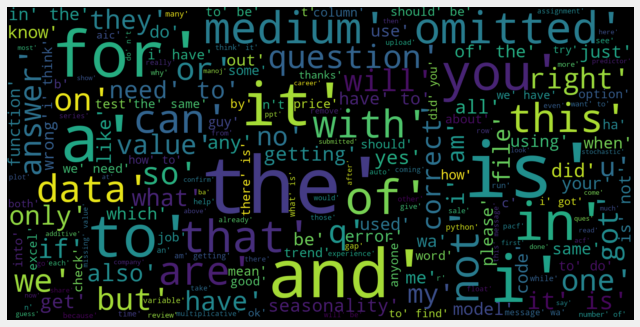

In [60]:
wordcloud=WordCloud(width=1600,height=800,max_font_size=200).generate(str(lemma_words))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show()

In [61]:
from nltk.probability import FreqDist
fdist = FreqDist(filtered_tokens)
fdist.most_common(20)

[('is', 255),
 ('the', 251),
 ('to', 221),
 ('i', 175),
 ('and', 152),
 ('it', 140),
 ('for', 126),
 ('of', 106),
 ('in', 103),
 ('a', 90),
 ('you', 88),
 ('not', 78),
 ('have', 78),
 ('we', 63),
 ('...', 61),
 ('be', 60),
 ('that', 60),
 ('media', 60),
 ('omitted', 60),
 ('this', 53)]

In [62]:
wordcloud.words_

{"the'": 1.0,
 "is'": 0.9455445544554455,
 "and'": 0.7128712871287128,
 "a'": 0.6782178217821783,
 "i'": 0.6633663366336634,
 "for'": 0.6386138613861386,
 "it'": 0.5594059405940595,
 "to'": 0.5445544554455446,
 "in'": 0.4306930693069307,
 "you'": 0.39603960396039606,
 "of'": 0.3415841584158416,
 "that'": 0.30198019801980197,
 "medium' omitted'": 0.297029702970297,
 "not'": 0.2524752475247525,
 "can'": 0.24257425742574257,
 "are'": 0.24257425742574257,
 "this'": 0.2376237623762376,
 "with'": 0.22277227722772278,
 "data'": 0.21287128712871287,
 "question'": 0.20297029702970298,
 "q'": 0.20297029702970298,
 "we'": 0.20297029702970298,
 "on'": 0.19801980198019803,
 "or'": 0.19801980198019803,
 "so'": 0.19306930693069307,
 "but'": 0.18811881188118812,
 "answer'": 0.18316831683168316,
 "one'": 0.17326732673267325,
 "will'": 0.17326732673267325,
 "got'": 0.15841584158415842,
 "right'": 0.15346534653465346,
 "value'": 0.13861386138613863,
 "u'": 0.13366336633663367,
 "correct'": 0.133663366336

In [ ]:
# another way of cleaning Text
'''def clean_messages(input_txt):
    input_txt=re.sub(r"[\d]"," ",str(input_txt)) #cleans digits
    input_txt=re.sub(r"[\W]"," ",str(input_txt)) # clean special characters
    input_txt=re.sub(r'\b[a-zA-Z]\b', '', input_txt) # clean single letters
    input_txt=re.sub(r"\s+"," ",str(input_txt)) # clean spaces
    return input_txt'''

In [ ]:
#another way of doing sentiment analysis on text
#opening file to read each line

In [63]:
with open("C:\\Users\\Arjit's Hardwork\\Desktop\\dipi\\PANDAS\\WhatsApp Chat with IPBA Batch 2 - Discussion.txt",'r+',encoding='utf-8') as myfile:
    file=myfile.readlines()
print(file)


['16/09/2019, 10:21 - Messages to this group are now secured with end-to-end encryption. Tap for more info.\n', '09/09/2019, 18:16 - +91 99641 30784 created group "IPBA Batch 2 - Discussion"\n', "16/09/2019, 10:21 - You joined using this group's invite link\n", '16/09/2019, 10:21 - Moses Kala IPBA: Waiting for this message\n', "16/09/2019, 11:23 - +91 94445 78480 joined using this group's invite link\n", '16/09/2019, 11:29 - +91 78690 22576: What time will the registration end\n', '16/09/2019, 11:35 - Raja Rao IPBA: You mean, what time is the party? 🎉🍻🎈\n', '16/09/2019, 11:36 - Moses Kala IPBA: Hello no party\n', '16/09/2019, 11:36 - Moses Kala IPBA: 8.30 pm post that dinner\n', '16/09/2019, 11:36 - +91 98301 39007: What registration?\n', '16/09/2019, 11:36 - +91 78690 22576: So we can report any time between 5 - 8:30! \n', 'Okay thanks\n', '16/09/2019, 11:37 - Moses Kala IPBA: No everyone should be there by 6\n', '16/09/2019, 11:37 - Moses Kala IPBA: Because we are taking head shots\n

In [ ]:
# another way of cleaning Text
'''def clean_messages(input_txt):
    input_txt=re.sub(r"[\d]"," ",str(input_txt)) #cleans digits
    input_txt=re.sub(r"[\W]"," ",str(input_txt)) # clean special characters
    input_txt=re.sub(r'\b[a-zA-Z]\b', '', input_txt) # clean single letters
    input_txt=re.sub(r"\s+"," ",str(input_txt)) # clean spaces
    return input_txt'''

In [64]:
type(file)

list

In [72]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

def clean_messages(lst):
    lst = np.vectorize(remove_pattern)(lst,"[\d]" )
    return lst
    lst = np.vectorize(remove_pattern)(lst,"[\W]")
    return lst
    lst = np.vectorize(remove_pattern)(lst,'\b[a-zA-Z]\b') 
    return lst
    lst = np.vectorize(remove_pattern)(lst,"\s+") 
    return lst
    lst = np.vectorize(remove_pattern)(lst, string.punctuations) 
    return lst
    lst = np.vectorize(remove_pattern)(lst, stop_words) 
    return lst

In [73]:
clean_messages(file)

array(['//, : - Messages to this group are now secured with end-to-end encryption. Tap for more info.\n',
       '//, : - +   created group "IPBA Batch  - Discussion"\n',
       "//, : - You joined using this group's invite link\n", ...,
       '//, : - Raja Rao IPBA: We have limited resources. We cannot spend time and effort in chasing candidates.\n',
       '//, : - Raja Rao IPBA: Please do not vote for me. I am a task master.\n',
       '//, : - Rishab IPBA: Sir , what I think is those who really are in utter need to work in the field of business Analytics they will respond to the placement team quickly. We can create deadlines for ourself so as to complete our task easily.😊😊\n'],
      dtype='<U849')

In [65]:

def sentiment_analyzer_scores(text):
    score = sid.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1


In [66]:
import seaborn as sns
def anl_whatsapp(lst, title='Group Chats', engl=True ):
    chat = []
    for line in lst:
        try:
            st = sentiment_analyzer_scores(line)
            chat.append(st)
        except:
            chat.append(0)
            return chat
    ax = sns.distplot(
        chat,
        kde=False,
        bins=3)
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#WhatsApp Chats',
          title="WhatsApp Sentment score of "+title)
    return chat

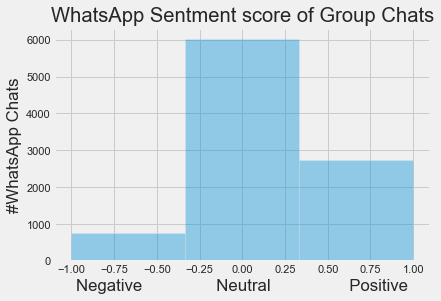

In [67]:
IPBAchats = anl_whatsapp(file)